In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm

# Script for random state initialization performances

In [8]:
ds = [2**i for i in range(5)]
Ns = [2**i for i in range(1, 6)]
ofdir = 'performances/g_'

for N in tqdm(Ns):
    for d in tqdm(ds):
        string = (str(d)+',')*N
        os.system('./exercise06 ' + f'-N {N} -d {string[:-1]} -i 10 -dl 1 -o {ofdir}')

100%|██████████| 5/5 [00:00<00:00, 70.17it/s]


Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.


Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.


 40%|████      | 2/5 [00:00<00:00,  4.84it/s]

Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.


Performance testing, 100.00% done.


 60%|██████    | 3/5 [00:49<00:41, 20.75s/it]

Performance testing, 100.00% done.


Performance testing, 100.00% done.
Performance testing, 100.00% done.


 80%|████████  | 4/5 [00:50<00:13, 13.13s/it]

Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.


100%|██████████| 5/5 [00:50<00:00, 10.06s/it]

Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.
Performance testing, 100.00% done.


# Check separable state normalization

In [9]:
data = np.loadtxt('exercise06_d2N10_sep.txt').view(complex)
np.prod(np.sum(data*data.conjugate(), 0))

(1.000026015848472+0j)

# Check general pure state normalization

In [10]:
data = np.loadtxt('exercise06_d2N10_pure.txt').view(complex)
np.sum(data*data.conjugate())

(1.0000004857658449+0j)

# Check performances

In [22]:
time_sep = np.empty((len(ds), len(Ns)))
time_gen = np.empty((len(ds), len(Ns)))

for i, d in enumerate(ds):
    for j, N in enumerate(Ns):
        time_sep[i, j], time_gen[i, j] = np.mean(np.loadtxt(f'{ofdir}d{d}N{N}_perf.txt'), 1)
        if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[0]==0):
            time_gen[i, j] = np.nan
        if(np.loadtxt(f'{ofdir}d{d}N{N}_sep.txt').shape[0]==0):
            time_sep[i, j] = np.nan
        

/tmp/ipykernel_2773/1594193375.py:7: UserWarning: loadtxt: Empty input file: "performances/g_d2N32_pure.txt"
  if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[0]==0):
/tmp/ipykernel_2773/1594193375.py:7: UserWarning: loadtxt: Empty input file: "performances/g_d4N16_pure.txt"
  if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[0]==0):
/tmp/ipykernel_2773/1594193375.py:7: UserWarning: loadtxt: Empty input file: "performances/g_d4N32_pure.txt"
  if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[0]==0):
/tmp/ipykernel_2773/1594193375.py:7: UserWarning: loadtxt: Empty input file: "performances/g_d8N16_pure.txt"
  if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[0]==0):
/tmp/ipykernel_2773/1594193375.py:7: UserWarning: loadtxt: Empty input file: "performances/g_d8N32_pure.txt"
  if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[0]==0):
/tmp/ipykernel_2773/1594193375.py:7: UserWarning: loadtxt: Empty input file: "performances/g_d16N8_pure.txt"
  if(np.loadtxt(f'{ofdir}d{d}N{N}_pure.txt').shape[

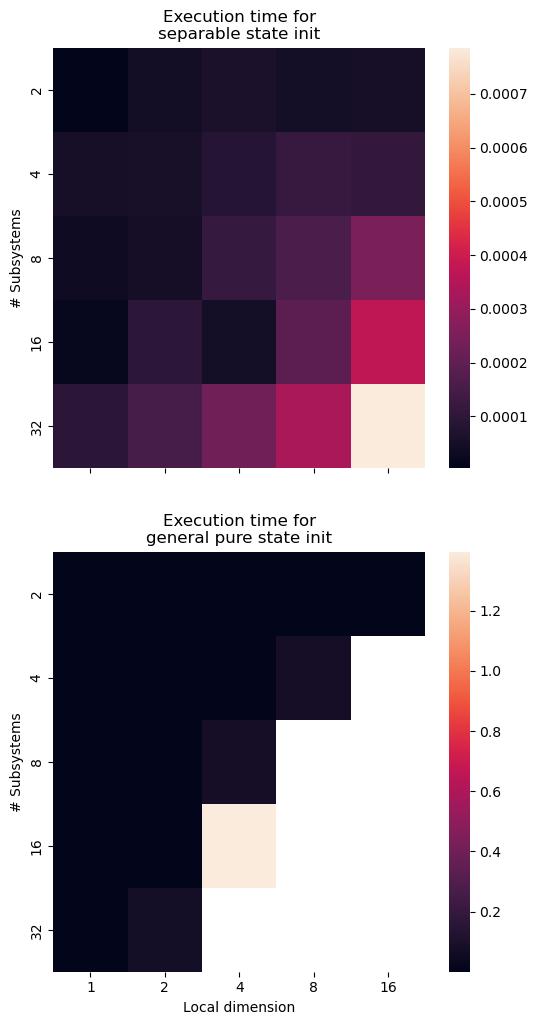

In [43]:
fig, (ax_sep, ax_pure) = plt.subplots(2, 1, figsize=(6, 12), sharex=True, sharey=True)

#hm_limits = [time_sep[time_sep>0].min(), time_gen[~np.isnan(time_gen)].max()]

sns.heatmap(time_sep, ax=ax_sep)
ax_sep.set_ylabel('# Subsystems')
ax_sep.set_title('Execution time for\nseparable state init')

sns.heatmap(time_gen, ax=ax_pure)
ax_pure.set_xticklabels(ds)
ax_pure.set_yticklabels(Ns)
ax_pure.set_xlabel('Local dimension')
ax_pure.set_ylabel('# Subsystems')
ax_pure.set_title('Execution time for\ngeneral pure state init')

fig.savefig('perfs.svg')